# Names


In [ ]:
# William Guesdon 2020/08/03

# House Price Prediction Competition

## Abstract

First competition with fellow DSS member.
The goal is to predict the home price. 

The best technique I want to use are:

* Random Forest Regressor
* Gradient boosting
* Emsemble Learning
* Support Vector Regression

## Initialize

In [16]:
### Import libraries

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation
from sklearn.svm import SVR

In [7]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

In [3]:
### Read the dataset
df = pd.read_csv('Data/train.csv')

## EDA

In [4]:
df.shape

(1460, 81)

The train dataset contain 1460 observation and 81 columns.

# Data Prep

In [5]:
# https://pandas.pydata.org/docs/getting_started/dsintro.html
# https://dev.to/chanduthedev/how-to-display-all-rows-from-data-frame-using-pandas-dha
# https://dev.to/chanduthedev/how-to-display-all-rows-from-data-frame-using-pandas-dha

pd.set_option('display.max_rows', 90)
pd.DataFrame(df.columns)

0
0              Id
1      MSSubClass
2        MSZoning
3     LotFrontage
4         LotArea
5          Street
6           Alley
7        LotShape
8     LandContour
9       Utilities
10      LotConfig
11      LandSlope
12   Neighborhood
13     Condition1
14     Condition2
15       BldgType
16     HouseStyle
17    OverallQual
18    OverallCond
19      YearBuilt
20   YearRemodAdd
21      RoofStyle
22       RoofMatl
23    Exterior1st
24    Exterior2nd
25     MasVnrType
26     MasVnrArea
27      ExterQual
28      ExterCond
29     Foundation
30       BsmtQual
31       BsmtCond
32   BsmtExposure
33   BsmtFinType1
34     BsmtFinSF1
35   BsmtFinType2
36     BsmtFinSF2
37      BsmtUnfSF
38    TotalBsmtSF
39        Heating
40      HeatingQC
41     CentralAir
42     Electrical
43       1stFlrSF
44       2ndFlrSF
45   LowQualFinSF
46      GrLivArea
47   BsmtFullBath
48   BsmtHalfBath
49       FullBath
50       HalfBath
51   BedroomAbvGr
52   KitchenAbvGr
53    KitchenQual
54   TotRmsAbvGrd
55     Functional
56     Fireplaces
57    FireplaceQu
58     GarageType
59    GarageYrBlt
60   GarageFinish
61     GarageCars
62     GarageArea
63     GarageQual
64     GarageCond
65     PavedDrive
66     WoodDeckSF
67    OpenPorchSF
68  EnclosedPorch
69      3SsnPorch
70    ScreenPorch
71       PoolArea
72         PoolQC
73          Fence
74    MiscFeature
75        MiscVal
76         MoSold
77         YrSold
78       SaleType
79  SaleCondition
80      SalePrice

In [8]:
# Is there missing values

# Determine the number of missing values for every column
df.isnull().sum()


MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBa

In [6]:
# UnImportant Columns?
# The ID Number is just for order purposes - has no berring on house price
# Utilities - does it really matter where the utilities come from?
# A majority of houses have heating
# What is functional?
# GarageArea is directly related to number of cars
# SaleType might not matter

# Alley, PoolQC, Fence, MiscFeature are almost only missing vlaues
columns_to_exclude = ['Id', 'Utilities', 'Heating', 'Functional', 'GarageArea', 'SaleType', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']



df.drop(columns_to_exclude, axis=1, inplace=True)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour LotConfig LandSlope  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    Inside       Gtl  ...           0        0    NaN   NaN   
1         Lvl       FR2       Gtl  ...           0        0    NaN   NaN   
2         Lvl    Inside       Gtl  ...           0        0    NaN   NaN   
3         Lvl    Corner       Gtl  ...           0        0    NaN   NaN   
4         Lvl       FR2       Gtl  ...           0        0    NaN   NaN   

  MiscFeature  MiscVal  MoSold  YrSold  SaleCondition SalePrice  
0         NaN        0       2    2008         Normal    208500  
1         NaN        0       5    2007         Normal    181500  
2         NaN        0       9    2008         Normal    223500  
3         NaN        0       2    2006        Abnorml    140000  
4         NaN        0      12    2008         Normal    250000  

[5 rows x 75 columns]

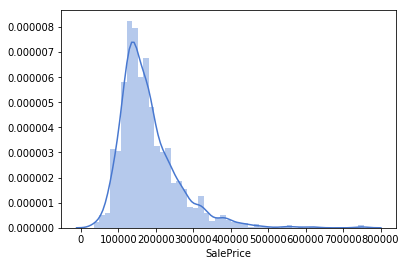

In [17]:
## Examine the target variable: Sales Price
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

x = 'SalePrice'
sns.set_palette("muted")
sns.distplot(df[x])
plt.ioff()
sns.set_palette(cbPalette)

## References

### Python

### Panda

* https://pandas.pydata.org/docs/getting_started/index.html
* https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html#compare-with-r

### Machine Learning

### Kaggles notebooks

* https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python